# Motivation

A standard neural network like a MLP has problems to learn to multiply two input numbers x1,x2!

Reason:
$y = x1*x2$ cannot be simulated using linear layers.


# A MLP has problems to learn to multiply

Here we try to learn the multiplication with a standard MLP and show that is does not work.

In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

def get_ground_truth_output_from_input_tensor(input_vec):
    x1 = input_vec[0].item()
    x2 = input_vec[1].item()
    x3 = input_vec[2].item()
    
    # target is x1*x2
    return torch.tensor( [x1*x2] )
    
    # target is x1+x2
    #return torch.tensor( [x1+x2] )


class net1(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, output_size)        
        
    def forward(self, input_vec):
        
        out1 = self.layer1(input_vec)
        out2 = self.layer2(out1)
        return out2

    
def learn(net, nr_train_steps):

    loss_fn = torch.nn.L1Loss()
    #loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

    list_of_errors = []
    list_of_avg_errors = []

    for train_step in range(nr_train_steps):

        if train_step % (nr_train_steps/10) == 0:
            print("train_step=", train_step)

        # generate a training sample
        x1 = numpy.random.uniform(low=0.0, high=10.0)
        x2 = numpy.random.uniform(low=0.0, high=10.0)
        x3 = numpy.random.uniform(low=0.0, high=10.0)
        input_vec   = torch.tensor([x1,x2,x3])
        teacher_vec = get_ground_truth_output_from_input_tensor( input_vec )
        #print( f"{input_vec} --> {teacher_vec}" )

        # forward step
        y_pred = net(input_vec)
        
        # compute loss
        loss = loss_fn(y_pred, teacher_vec)

        # save current loss for plotting it later
        error = abs(teacher_vec-y_pred)
        list_of_errors.append( error.item() )

        if len(list_of_errors) > 100 :
            list_of_avg_errors.append( numpy.mean(list_of_errors[-100:]) )

        # backward step -> computes gradients
        net.zero_grad()
        loss.backward()

        # optimizer step -> adapts weights
        optimizer.step()

        if False:
            error = abs(teacher_vec-y_pred)
            print( f"teacher={teacher_vec}, predicted={y_pred:} -> error={error}" )
        
    plt.plot( list_of_avg_errors )
    plt.show()
    
    print("Testing:")
    numbers = [0, 0.5, 1.0, 2.0, 3.0, 4.0]
    x3 = 2
    for x1 in numbers:
        for x2 in numbers:
            input_vec = torch.tensor([x1,x2,x3], dtype=torch.float32)
            y_pred = net(input_vec)            
            
            gt = get_ground_truth_output_from_input_tensor( input_vec )
            print( f"f({x1}, {x2}, {x3})={gt.detach().numpy()[0]} <-> net: {y_pred.detach().numpy()[0]:.2f}" )

train_step= 0
train_step= 3000
train_step= 6000
train_step= 9000
train_step= 12000
train_step= 15000
train_step= 18000
train_step= 21000
train_step= 24000
train_step= 27000


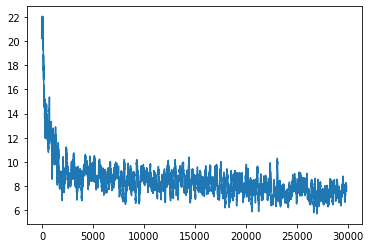

Testing:
f(0, 0, 2)=0.0 <-> net: -10.08
f(0, 0.5, 2)=0.0 <-> net: -8.28
f(0, 1.0, 2)=0.0 <-> net: -6.48
f(0, 2.0, 2)=0.0 <-> net: -2.87
f(0, 3.0, 2)=0.0 <-> net: 0.74
f(0, 4.0, 2)=0.0 <-> net: 4.35
f(0.5, 0, 2)=0.0 <-> net: -8.22
f(0.5, 0.5, 2)=0.25 <-> net: -6.42
f(0.5, 1.0, 2)=0.5 <-> net: -4.61
f(0.5, 2.0, 2)=1.0 <-> net: -1.01
f(0.5, 3.0, 2)=1.5 <-> net: 2.60
f(0.5, 4.0, 2)=2.0 <-> net: 6.21
f(1.0, 0, 2)=0.0 <-> net: -6.36
f(1.0, 0.5, 2)=0.5 <-> net: -4.56
f(1.0, 1.0, 2)=1.0 <-> net: -2.75
f(1.0, 2.0, 2)=2.0 <-> net: 0.86
f(1.0, 3.0, 2)=3.0 <-> net: 4.46
f(1.0, 4.0, 2)=4.0 <-> net: 8.07
f(2.0, 0, 2)=0.0 <-> net: -2.64
f(2.0, 0.5, 2)=1.0 <-> net: -0.83
f(2.0, 1.0, 2)=2.0 <-> net: 0.97
f(2.0, 2.0, 2)=4.0 <-> net: 4.58
f(2.0, 3.0, 2)=6.0 <-> net: 8.19
f(2.0, 4.0, 2)=8.0 <-> net: 11.80
f(3.0, 0, 2)=0.0 <-> net: 1.09
f(3.0, 0.5, 2)=1.5 <-> net: 2.89
f(3.0, 1.0, 2)=3.0 <-> net: 4.69
f(3.0, 2.0, 2)=6.0 <-> net: 8.30
f(3.0, 3.0, 2)=9.0 <-> net: 11.91
f(3.0, 4.0, 2)=12.0 <-> net: 15.52
f(4.

In [2]:
my_net1 = net1(3,100,1)
learn(net=my_net1, nr_train_steps=30000)

# A network with other operations can learn to multiply

## Computing all multiplication variants of an input tensor

In [3]:
x = torch.tensor( [1,2,3], dtype=torch.float32 )

In [4]:
len(x)

3

In [5]:
x+x

tensor([2., 4., 6.])

In [6]:
x*x

tensor([1., 4., 9.])

In [7]:
x.view(3,1)

tensor([[1.],
        [2.],
        [3.]])

In [8]:
x.view(1,3)

tensor([[1., 2., 3.]])

In [9]:
M = x.view(3,1) * x.view(1,3)
M

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [10]:
M.flatten()

tensor([1., 2., 3., 2., 4., 6., 3., 6., 9.])

In [11]:
l1 = torch.nn.Linear(3**2, 1)

In [12]:
l1.weight

Parameter containing:
tensor([[-0.0677,  0.1915, -0.2600,  0.1841,  0.1857, -0.2825, -0.2740,  0.0541,
         -0.0521]], requires_grad=True)

In [13]:
l1.bias

Parameter containing:
tensor([-0.0775], requires_grad=True)

In [14]:
l1( M.flatten() )

tensor([-2.0925], grad_fn=<AddBackward0>)

In [15]:
torch.dot( l1.weight.flatten(), M.flatten() ) + l1.bias

tensor([-2.0925], grad_fn=<AddBackward0>)

## A new network type

The following network first computes all multiplicative variants of its inputs and then can learn how to combine these inputs using a linear layer.

In [16]:
class net2(torch.nn.Module):
    
    def __init__(self, input_size):
        
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size**2, 1)
        
    def forward(self, x):
        
        N = len(x)
               
        M = x.view(N,1) * x.view(1,N)
        M_flat = torch.flatten(M)
        out = self.layer1( M_flat )
        return out

train_step= 0
train_step= 4000
train_step= 8000
train_step= 12000
train_step= 16000
train_step= 20000
train_step= 24000
train_step= 28000
train_step= 32000
train_step= 36000


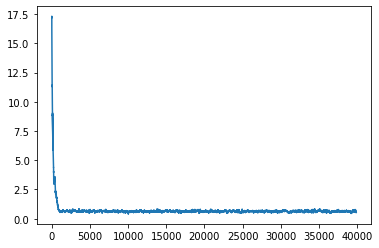

Testing:
f(0, 0, 2)=0.0 <-> net: 0.04
f(0, 0.5, 2)=0.0 <-> net: 0.03
f(0, 1.0, 2)=0.0 <-> net: 0.02
f(0, 2.0, 2)=0.0 <-> net: -0.00
f(0, 3.0, 2)=0.0 <-> net: -0.04
f(0, 4.0, 2)=0.0 <-> net: -0.09
f(0.5, 0, 2)=0.0 <-> net: 0.04
f(0.5, 0.5, 2)=0.25 <-> net: 0.28
f(0.5, 1.0, 2)=0.5 <-> net: 0.52
f(0.5, 2.0, 2)=1.0 <-> net: 1.00
f(0.5, 3.0, 2)=1.5 <-> net: 1.46
f(0.5, 4.0, 2)=2.0 <-> net: 1.91
f(1.0, 0, 2)=0.0 <-> net: 0.03
f(1.0, 0.5, 2)=0.5 <-> net: 0.53
f(1.0, 1.0, 2)=1.0 <-> net: 1.02
f(1.0, 2.0, 2)=2.0 <-> net: 1.99
f(1.0, 3.0, 2)=3.0 <-> net: 2.95
f(1.0, 4.0, 2)=4.0 <-> net: 3.90
f(2.0, 0, 2)=0.0 <-> net: -0.00
f(2.0, 0.5, 2)=1.0 <-> net: 0.99
f(2.0, 1.0, 2)=2.0 <-> net: 1.98
f(2.0, 2.0, 2)=4.0 <-> net: 3.95
f(2.0, 3.0, 2)=6.0 <-> net: 5.91
f(2.0, 4.0, 2)=8.0 <-> net: 7.86
f(3.0, 0, 2)=0.0 <-> net: -0.07
f(3.0, 0.5, 2)=1.5 <-> net: 1.42
f(3.0, 1.0, 2)=3.0 <-> net: 2.91
f(3.0, 2.0, 2)=6.0 <-> net: 5.88
f(3.0, 3.0, 2)=9.0 <-> net: 8.84
f(3.0, 4.0, 2)=12.0 <-> net: 11.79
f(4.0, 0, 2)=0.

In [17]:
my_net2 = net2(3)
learn(net=my_net2, nr_train_steps=40000)

In [18]:
my_net2.layer1.weight

Parameter containing:
tensor([[-0.0153,  0.7553, -0.1850,  0.2436, -0.0057, -0.0683,  0.1901,  0.0641,
          0.0067]], requires_grad=True)

In [25]:
T = my_net2.layer1.weight.view(3,3)
W = T.detach().numpy()
W

array([[-0.01534308,  0.75526595, -0.185046  ],
       [ 0.24358693, -0.00566215, -0.06830511],
       [ 0.19012325,  0.06413131,  0.00666862]], dtype=float32)

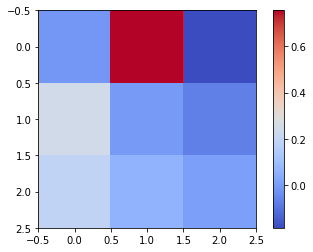

In [32]:
plt.imshow(W, cmap="coolwarm")
plt.colorbar()
plt.show()